In [1]:
# edit these dataset paths as needed
BOOKS_DATASET = 'datasets/bookdata.csv'

In [2]:
import pandas as pd

df = pd.read_csv(BOOKS_DATASET)
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


## Initial EDA


--- A. Analysis of Pages, Number of Ratings, and Price ---


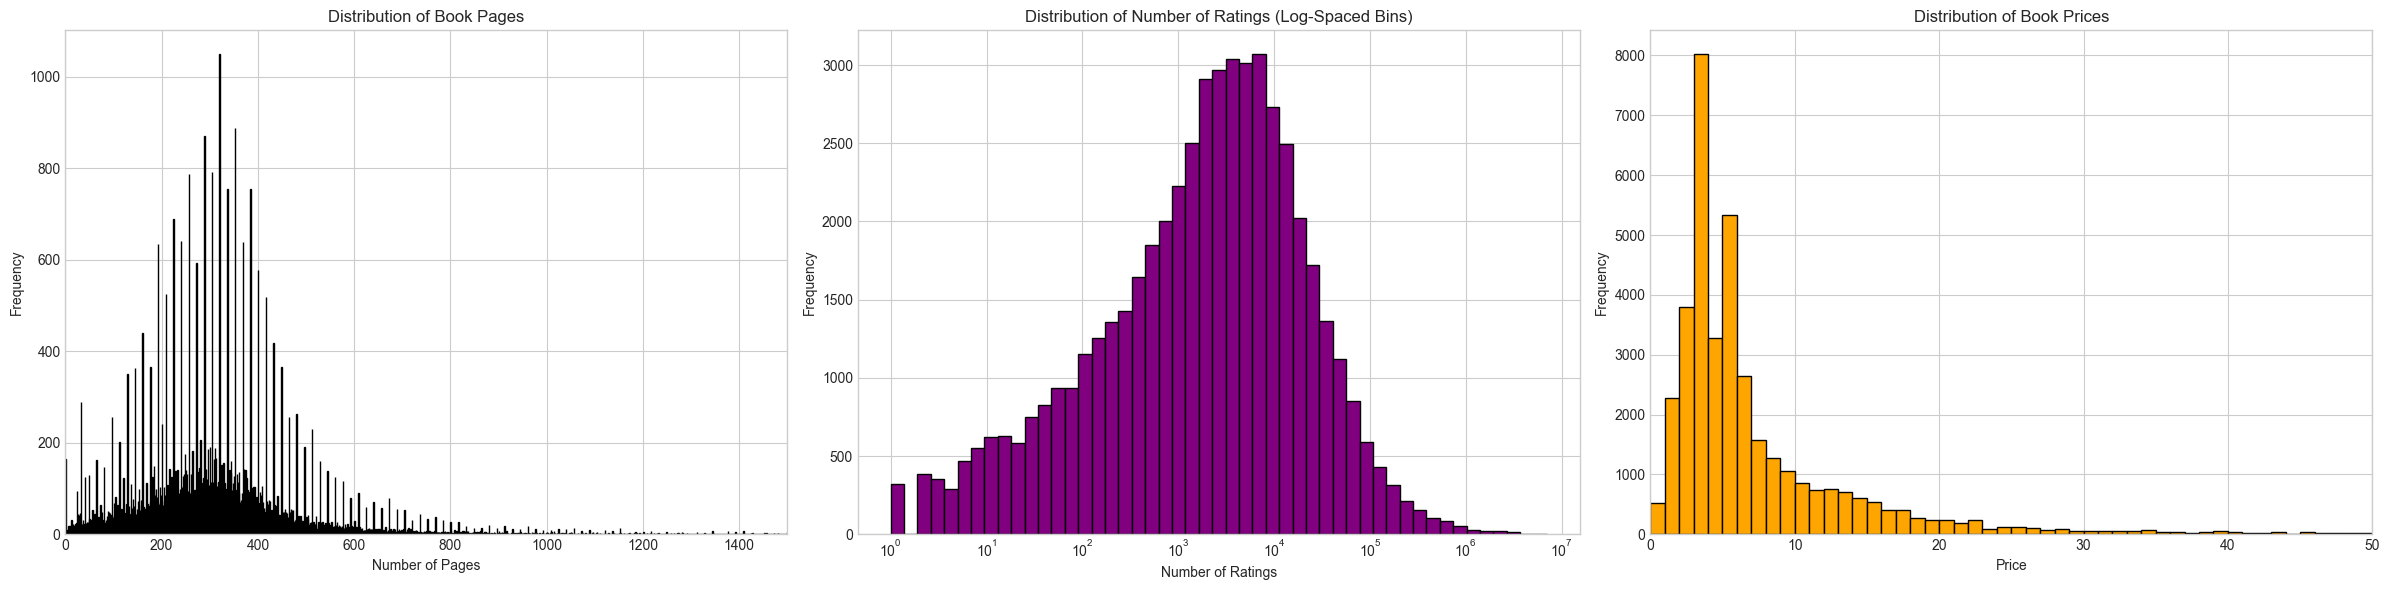


--- B. Analysis of Top Publishers and Languages ---


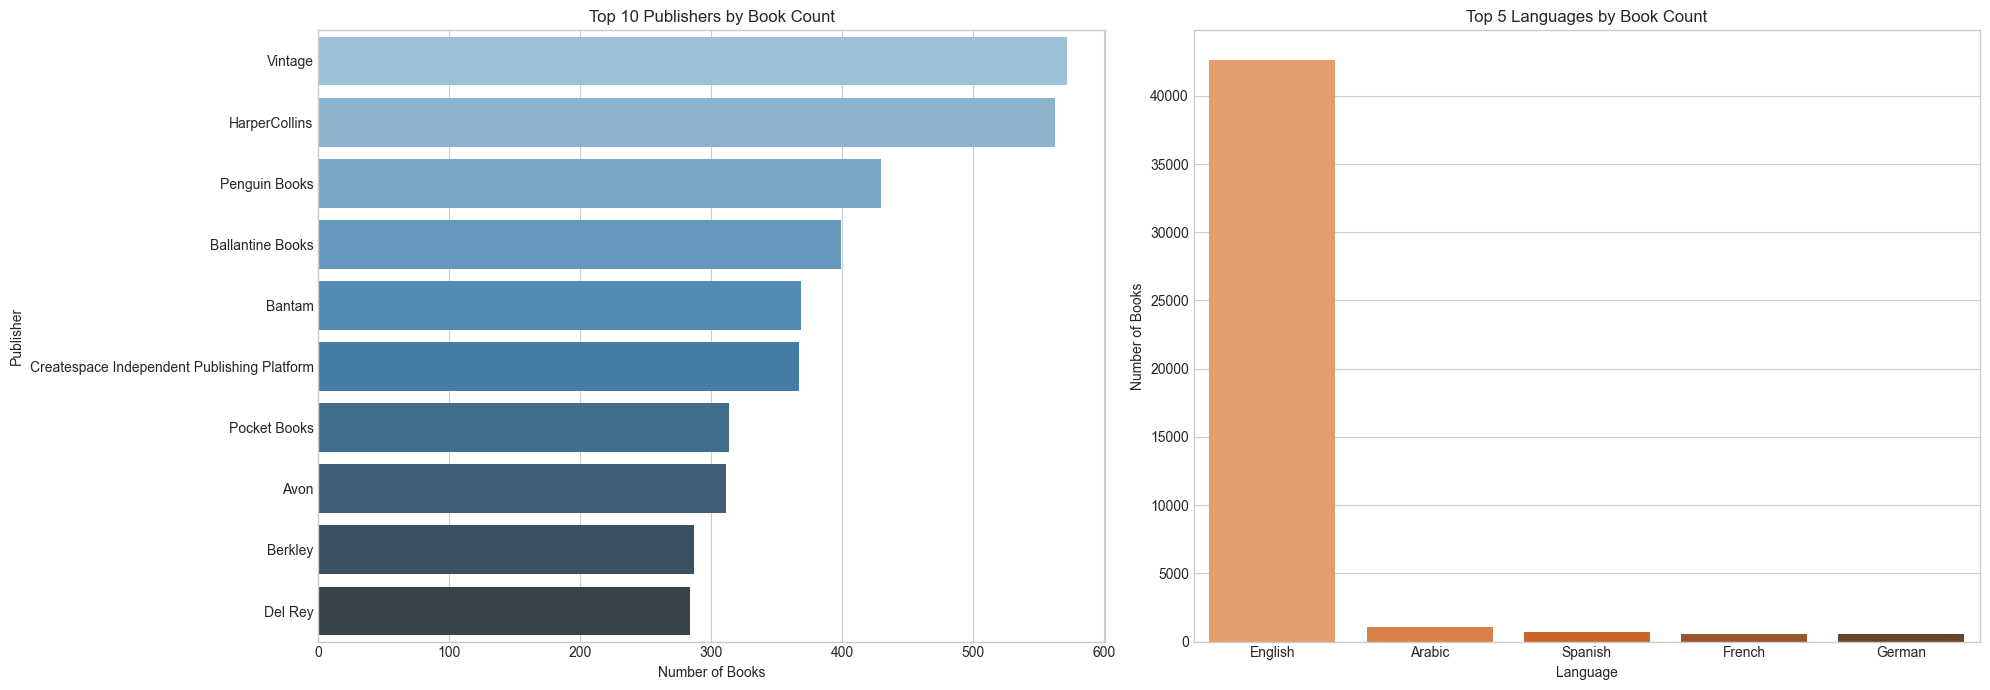


--- C. Publication Trends Over Time ---


/var/folders/_6/dfpcs_l91_73cbk9jc93gxp40000gn/T/ipykernel_55018/1812369494.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year'] = pd.to_datetime(df['publishDate'], errors='coerce').dt.year


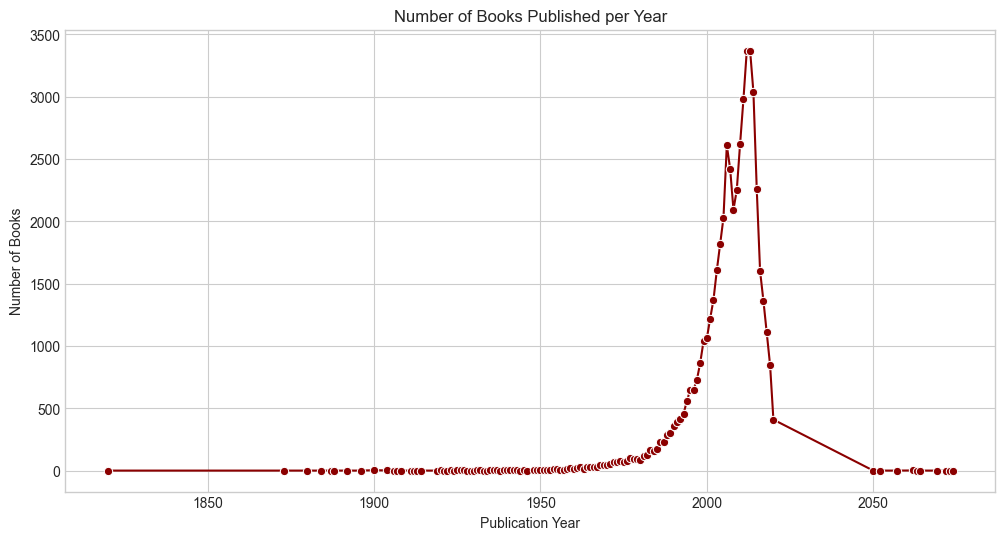

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assume 'df' is your loaded DataFrame.

# --- A. Numerical Data Analysis: Pages, Number of Ratings, and Price ---
print("\n--- A. Analysis of Pages, Number of Ratings, and Price ---")
plt.style.use('seaborn-v0_8-whitegrid')

# Prepare numeric columns
pages_numeric = pd.to_numeric(df['pages'], errors='coerce')
prices = pd.to_numeric(df['price'], errors='coerce')

# Histograms for Pages, Ratings, and Price
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Pages Histogram: 1 bin per page (up to 1500 pages)
max_pages = int(min(1500, np.nanmax(pages_numeric)))
axs[0].hist(pages_numeric.dropna(), bins=np.arange(0, max_pages + 2, 1), color='teal', edgecolor='black')
axs[0].set_title('Distribution of Book Pages')
axs[0].set_xlabel('Number of Pages')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(0, max_pages)

# Number of Ratings Histogram (Log Scale): 1 bin per rating
# The original code's approach for bins is correct but results in a crowded plot.
# A log scale for bins is more appropriate to handle the wide range of data.
max_ratings = int(np.nanmax(df['numRatings']))
log_bins = np.logspace(0, np.log10(max_ratings), 50) # Use log-spaced bins for a better view
axs[1].hist(df['numRatings'], bins=log_bins, color='purple', edgecolor='black')
axs[1].set_title('Distribution of Number of Ratings (Log-Spaced Bins)')
axs[1].set_xlabel('Number of Ratings')
axs[1].set_ylabel('Frequency')
axs[1].set_xscale('log')

# Price Histogram: 1 bin per unit price (up to $50)
max_price = int(min(50, np.nanmax(prices)))
axs[2].hist(prices.dropna(), bins=np.arange(0, max_price + 2, 1), color='orange', edgecolor='black')
axs[2].set_title('Distribution of Book Prices')
axs[2].set_xlabel('Price')
axs[2].set_ylabel('Frequency')
axs[2].set_xlim(0, max_price)

plt.tight_layout()
plt.show()

# --- B. Categorical Data Analysis: Publishers and Languages ---
print("\n--- B. Analysis of Top Publishers and Languages ---")
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Top 10 Publishers
top_publishers = df['publisher'].value_counts().nlargest(10)
sns.barplot(x=top_publishers.values, y=top_publishers.index, ax=axs[0], palette='Blues_d', hue=top_publishers.index, legend=False)
axs[0].set_title('Top 10 Publishers by Book Count')
axs[0].set_xlabel('Number of Books')
axs[0].set_ylabel('Publisher')

# Top 5 Languages
top_languages = df['language'].value_counts().nlargest(5)
sns.barplot(x=top_languages.index, y=top_languages.values, ax=axs[1], palette='Oranges_d', hue=top_languages.index, legend=False)
axs[1].set_title('Top 5 Languages by Book Count')
axs[1].set_xlabel('Language')
axs[1].set_ylabel('Number of Books')

plt.tight_layout()
plt.show()

# --- C. Time-Series Analysis: Publication Trends ---
print("\n--- C. Publication Trends Over Time ---")
df['year'] = pd.to_datetime(df['publishDate'], errors='coerce').dt.year
books_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=books_per_year.index, y=books_per_year.values, marker='o', color='darkred')
plt.title('Number of Books Published per Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()


From the above analysis, we can see that

- Book Pages Distribution
    - Most books fall between 200–400 pages, suggesting publishers and readers prefer mid-length books
    - The distribution is right-skewed, meaning short/medium-length books dominate the dataset
    - This indicates that most books aligns well with typical narrative depth found in movies. This makes such books suitable for mapping to clustered movie genres (e.g., thrillers, dramas) where concise yet rich storytelling is preferred. Longer books (>600 pages) could correspond to epic or complex movie genres (like fantasy or historical sagas) that require extended storytelling
- Number of Ratings Distribution
    - Highly skewed: most books have few ratings, while a small subset are extremely popular
- Distribution of Book Prices
    - Most books are affordable and accessible 


--- Correlation Matrix ---


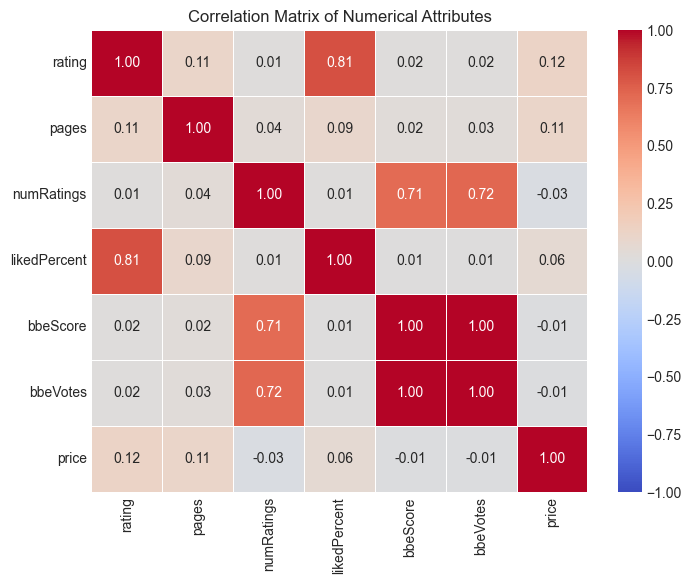

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Work on a copy to avoid SettingWithCopyWarning
numerical_df = df[['rating', 'pages', 'awards', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'price']].copy()

# Convert 'pages' and 'price' columns to numeric, coercing errors to NaN
numerical_df['pages'] = pd.to_numeric(numerical_df['pages'], errors='coerce')
numerical_df['price'] = pd.to_numeric(numerical_df['price'], errors='coerce')

# Compute the correlation matrix (excluding non-numeric 'awards')
correlation_matrix = numerical_df.drop(columns=['awards']).corr()

print("\n--- Correlation Matrix ---")
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    vmin=-1, vmax=1
)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()


- Rating and LikedPercent are highly correlated, indicating they express similar user sentiment, one of them could be dropped or down-weighted in clustering
- Popularity-related metrics are strongly interlinked, suggesting that books with more reviews tend to score higher across platforms, a potential cluster axis for mainstream titles
- Weak correlation between ratings and number of ratings shows that popularity doesn’t always reflect perceived quality, valuable for diversifying recommendations where the recommender can leverage this to promote high-quality, less-known books for diversity
- Price is largely independent of book quality or popularity, meaning affordability can be modeled as a separate personalization feature

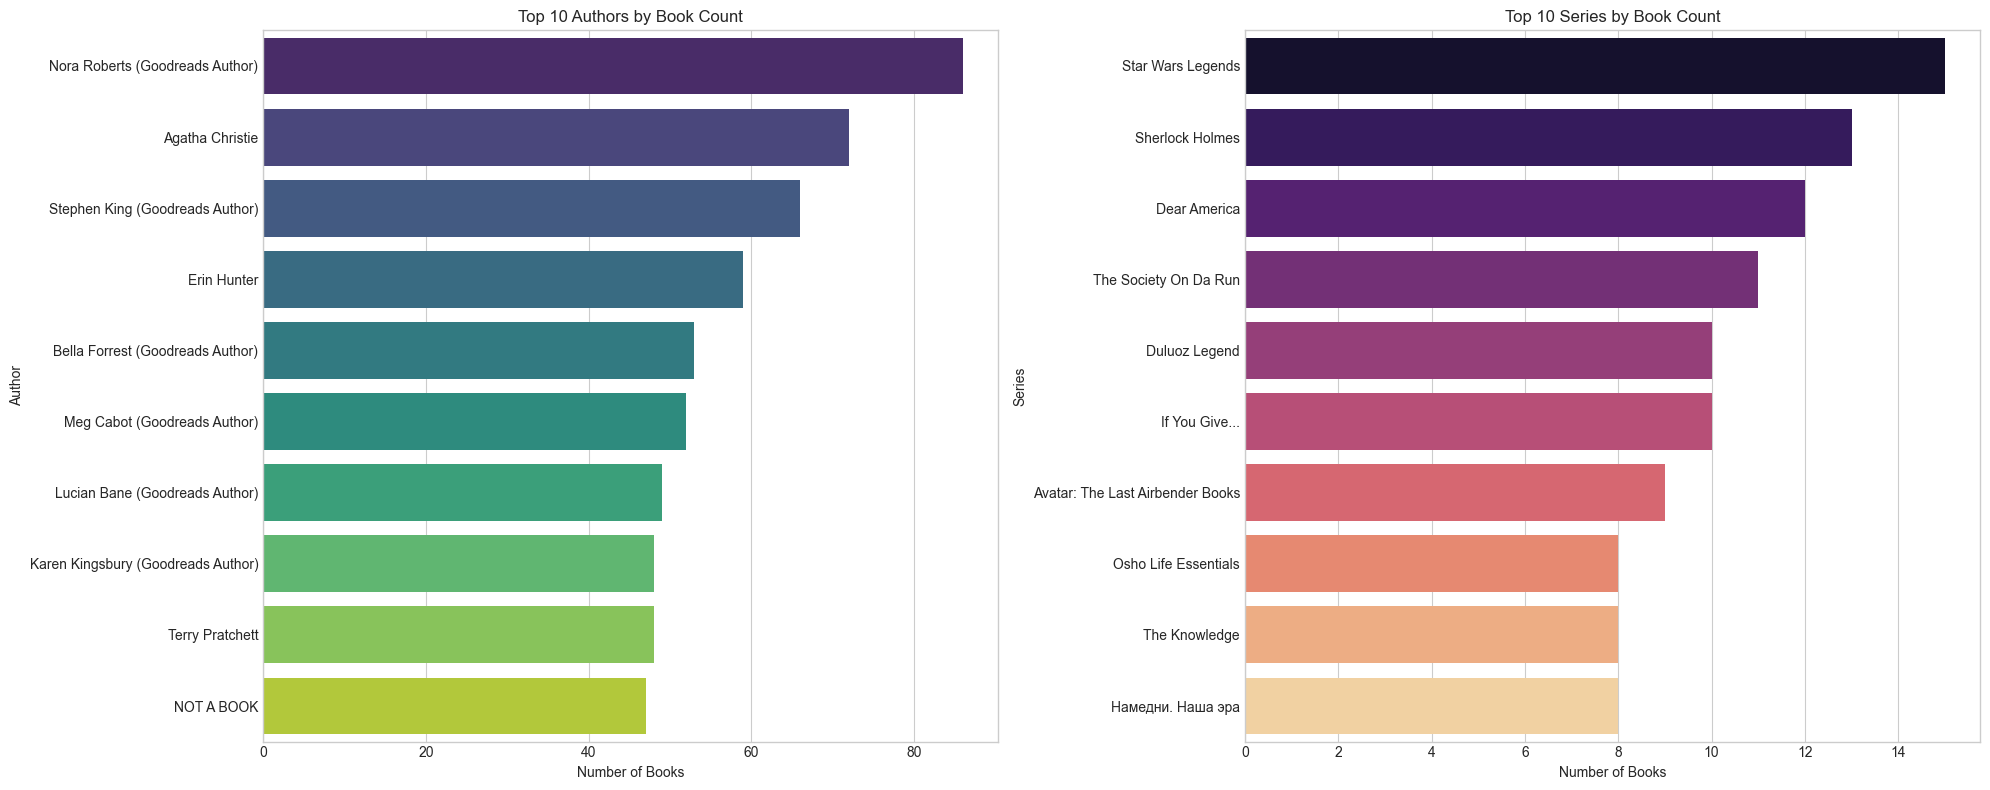

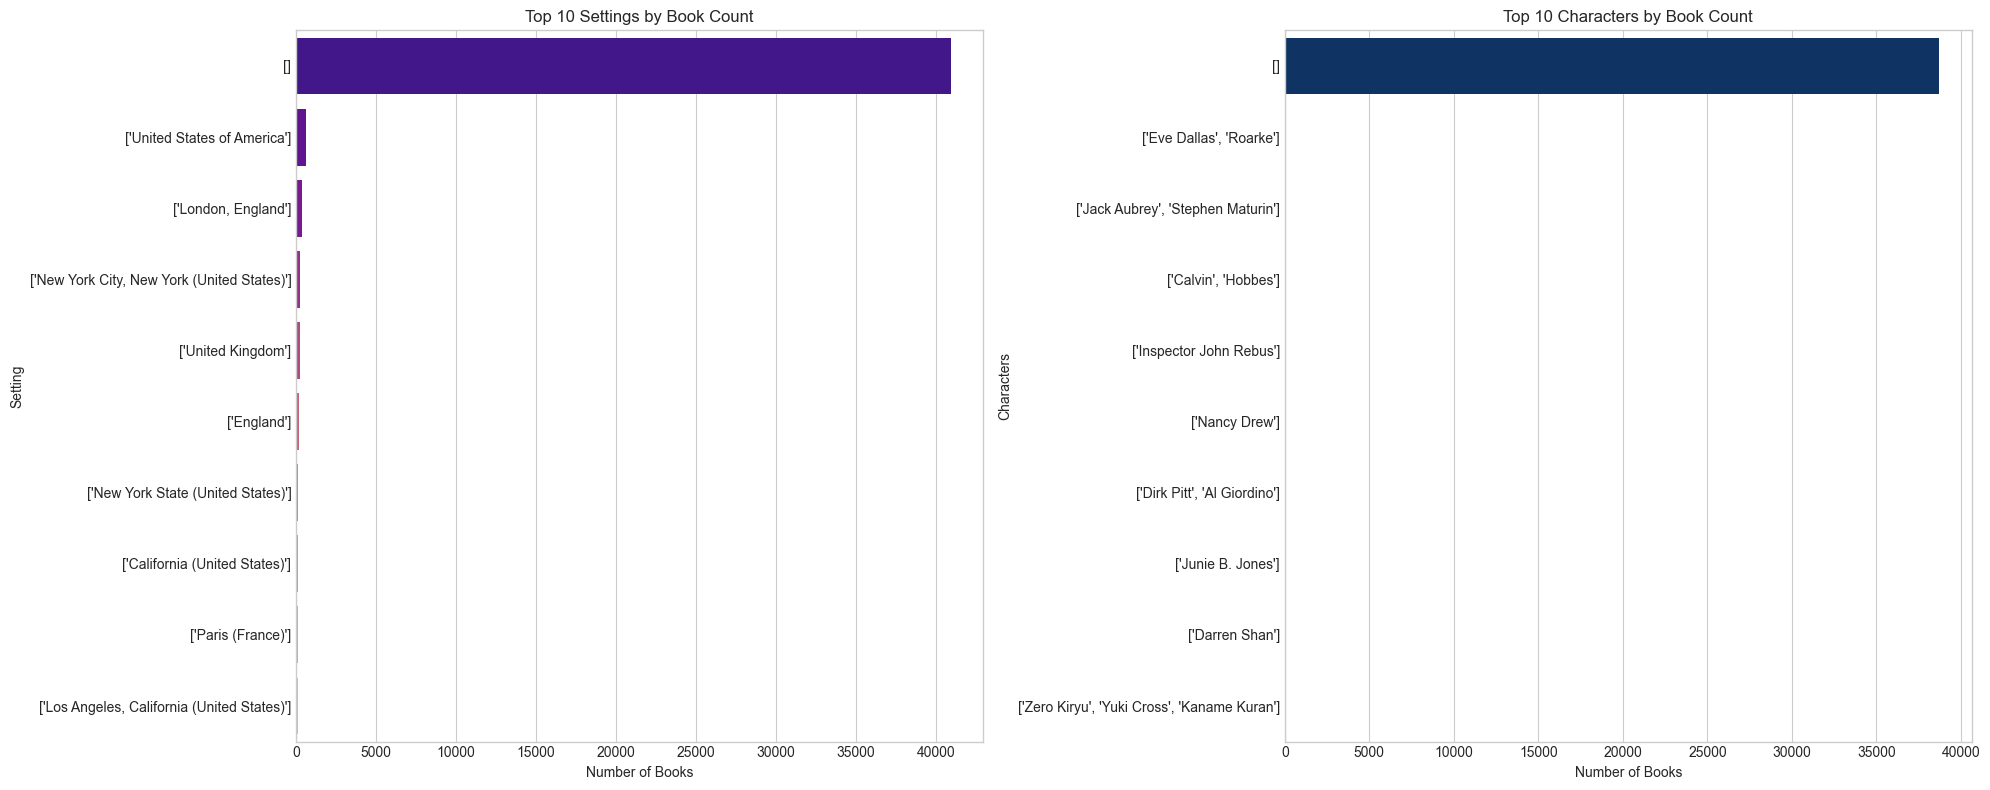

In [8]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Set a font that supports many Unicode glyphs to avoid warnings
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('seaborn-v0_8-whitegrid')

# --- A. Top Authors and Series ---
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Top 10 Authors
top_authors = df['author'].value_counts().nlargest(10)
sns.barplot(x=top_authors.values, y=top_authors.index, ax=axs[0], palette='viridis', hue=top_authors.index, legend=False)
axs[0].set_title('Top 10 Authors by Book Count')
axs[0].set_xlabel('Number of Books')
axs[0].set_ylabel('Author')

# Top 10 Series
top_series = df['series'].value_counts().nlargest(10)
sns.barplot(x=top_series.values, y=top_series.index, ax=axs[1], palette='magma', hue=top_series.index, legend=False)
axs[1].set_title('Top 10 Series by Book Count')
axs[1].set_xlabel('Number of Books')
axs[1].set_ylabel('Series')

plt.tight_layout()
plt.show()

# --- B. Top Settings and Characters ---
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Top 10 Settings (excluding empty values)
settings_filtered = df['setting'].replace('', np.nan).dropna()
top_settings = settings_filtered.value_counts().nlargest(10)
sns.barplot(x=top_settings.values, y=top_settings.index, ax=axs[0], palette='plasma', hue=top_settings.index, legend=False)
axs[0].set_title('Top 10 Settings by Book Count')
axs[0].set_xlabel('Number of Books')
axs[0].set_ylabel('Setting')

# Top 10 Characters
top_characters = df['characters'].value_counts().nlargest(10)
sns.barplot(x=top_characters.values, y=top_characters.index, ax=axs[1], palette='cividis', hue=top_characters.index, legend=False)
axs[1].set_title('Top 10 Characters by Book Count')
axs[1].set_xlabel('Number of Books')
axs[1].set_ylabel('Characters')

plt.tight_layout()
plt.show()

- most settings and characters are empty: perhaps not a useful feature to use for clustering books by their settings/characters


--- A. Analysis of Genre Distribution ---

Total number of unique genres: 983


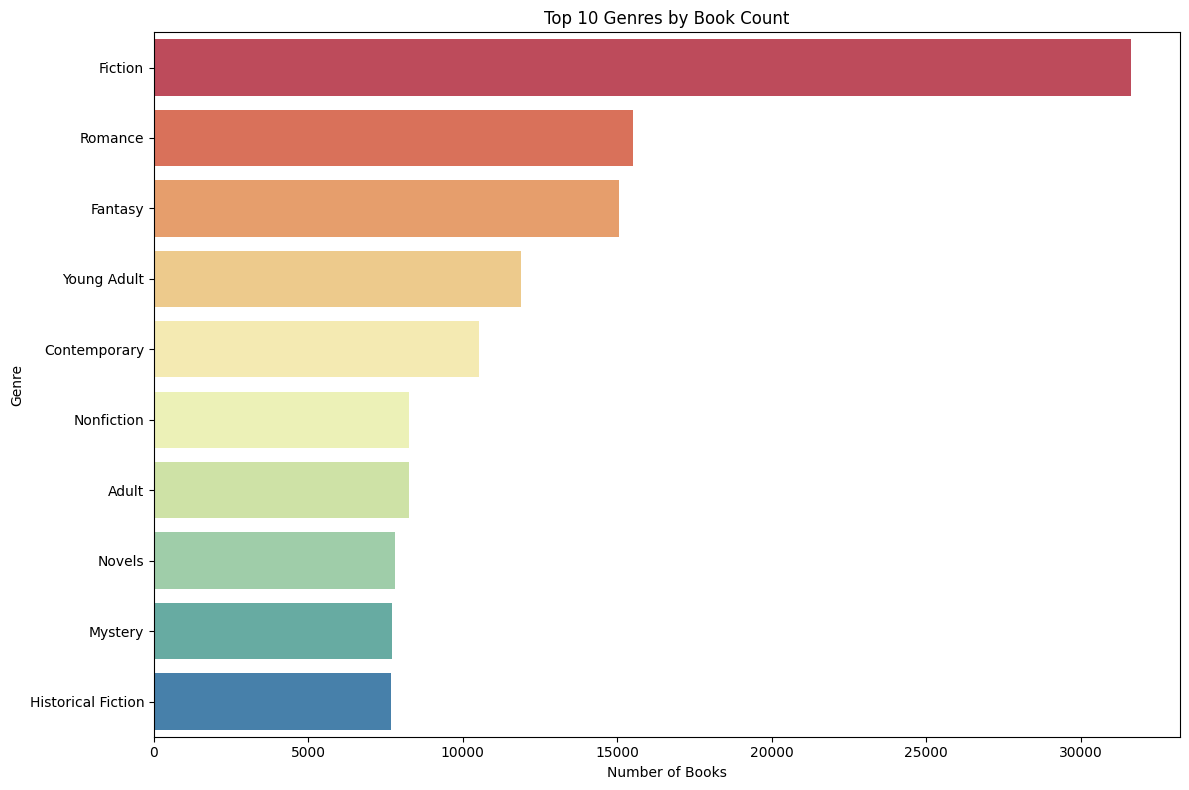

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Set a font that is more likely to be available and avoids glyph warnings
plt.rcParams['font.family'] = 'DejaVu Sans'

# --- A. Genre Distribution Analysis ---
print("\n--- A. Analysis of Genre Distribution ---")

# Step 1: Convert the string representation of a list into an actual list
# Use a lambda function to handle cases where 'genres' might be an empty string or a non-list
df['genres_list'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Step 2: Explode the list of genres into individual rows
exploded_genres = df.explode('genres_list')

# Step 3: Filter out any empty rows that might have been created from empty lists
exploded_genres = exploded_genres[exploded_genres['genres_list'].apply(lambda x: x is not None and x != '')]

# Step 4: Get the unique genres and their count
unique_genres = exploded_genres['genres_list'].unique()
number_of_unique_genres = len(unique_genres)
print(f"\nTotal number of unique genres: {number_of_unique_genres}")

# Step 5: Plot the distribution of the top genres
genre_counts = exploded_genres['genres_list'].value_counts()
top_genres = genre_counts.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Spectral', hue=top_genres.index, legend=False)
plt.title('Top 10 Genres by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

- Genre Distribution
    - The book dataset is heavily dominated by Fiction, which far exceeds all other genres in count
    - The imbalance could influence the clustering results, as clusters may naturally group around the most represented genres (e.g., Fiction or Romance).
    - To mitigate bias, normalization or weighting by genre frequency might be considered during clustering.

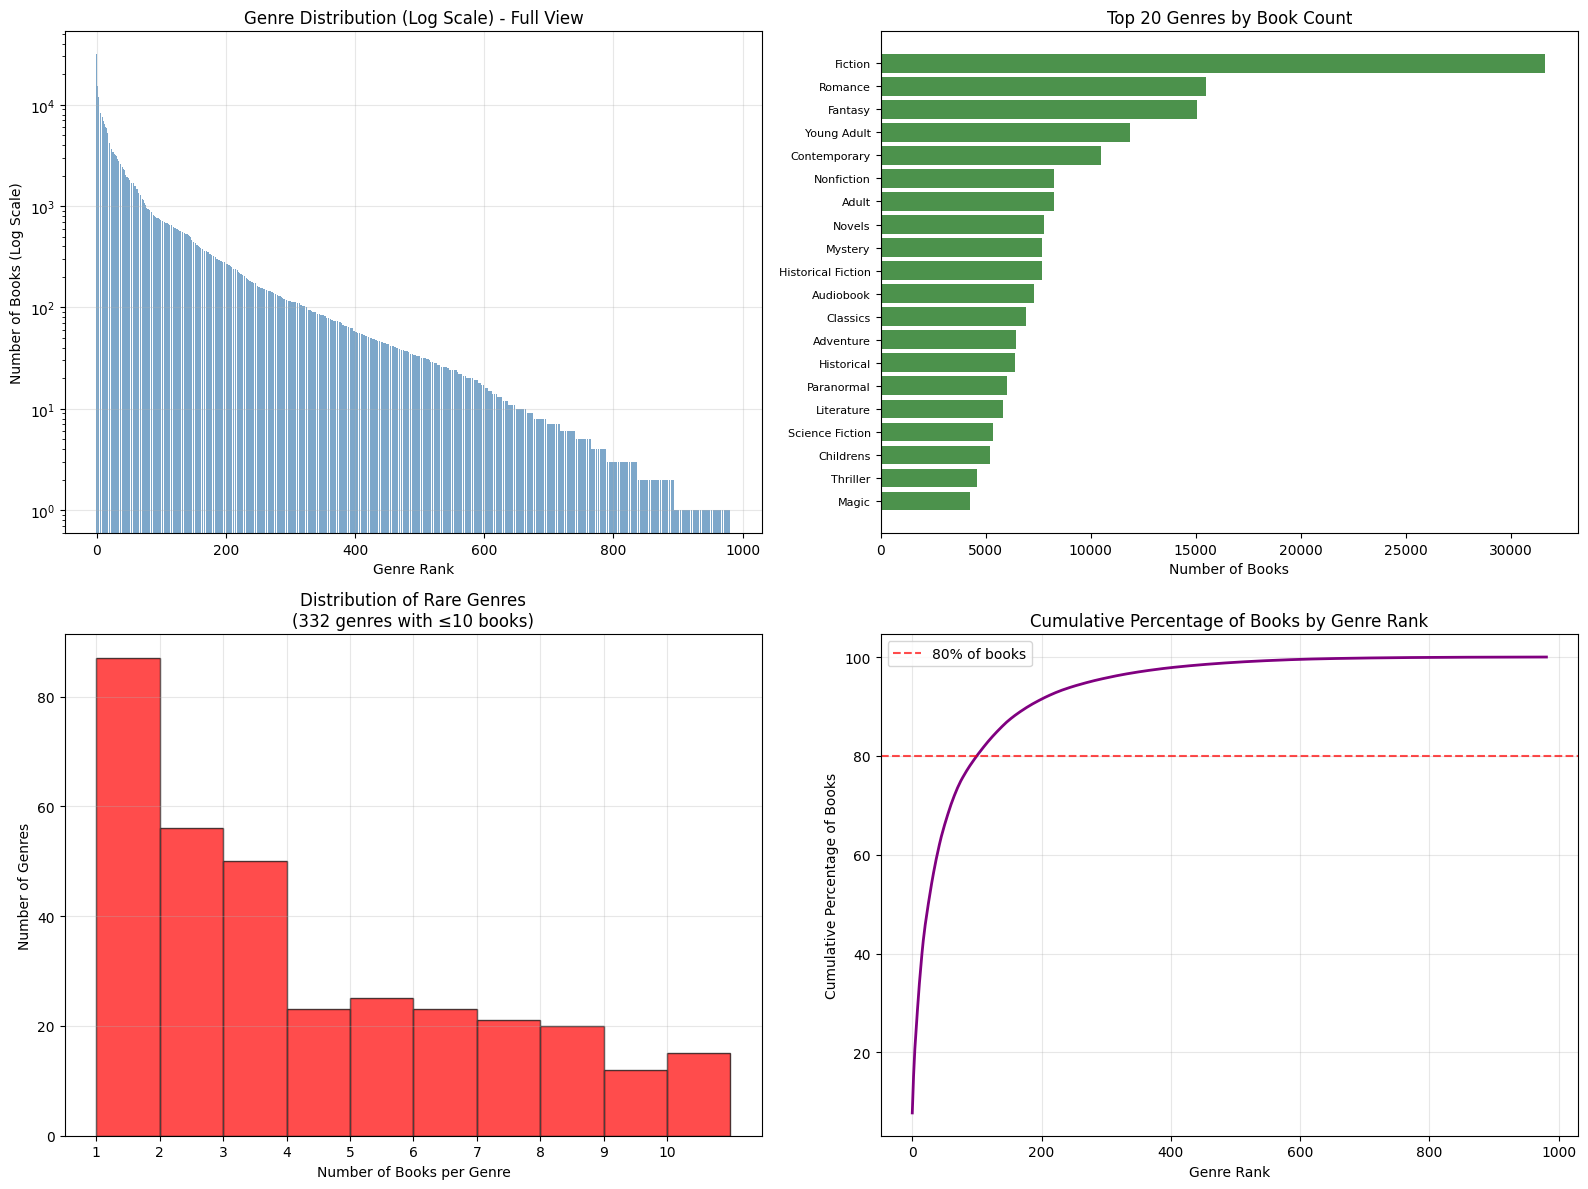


--- Genre Distribution Statistics ---
Total number of unique genres: 982
Genres with only 1 book: 87
Genres with 5 or fewer books: 241
Genres with 10 or fewer books: 332
Percentage of genres with ≤5 books: 24.5%
Percentage of genres with ≤10 books: 33.8%
Top 101 genres account for 80% of all books
This represents 10.3% of all genres


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Convert the string representation of genres to actual lists
df['genres_list'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Explode the list of genres into individual rows
exploded_genres = df.explode('genres_list')

# Filter out any empty rows
exploded_genres = exploded_genres[exploded_genres['genres_list'].apply(lambda x: x is not None and x != '')]

# Get genre counts
genre_counts = exploded_genres['genres_list'].value_counts()

# Create a comprehensive visualization showing the long-tail distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Full distribution (log scale)
axes[0, 0].bar(range(len(genre_counts)), genre_counts.values, color='steelblue', alpha=0.7)
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Genre Distribution (Log Scale) - Full View')
axes[0, 0].set_xlabel('Genre Rank')
axes[0, 0].set_ylabel('Number of Books (Log Scale)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Top 20 genres
top_20 = genre_counts.head(20)
axes[0, 1].barh(range(len(top_20)), top_20.values, color='darkgreen', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_20)))
axes[0, 1].set_yticklabels(top_20.index, fontsize=8)
axes[0, 1].set_title('Top 20 Genres by Book Count')
axes[0, 1].set_xlabel('Number of Books')
axes[0, 1].invert_yaxis()

# 3. Bottom genres (genres with very few books)
bottom_genres = genre_counts[genre_counts <= 10]  # Genres with 10 or fewer books
axes[1, 0].hist(bottom_genres.values, bins=range(1, 12), color='red', alpha=0.7, edgecolor='black')
axes[1, 0].set_title(f'Distribution of Rare Genres\n({len(bottom_genres)} genres with ≤10 books)')
axes[1, 0].set_xlabel('Number of Books per Genre')
axes[1, 0].set_ylabel('Number of Genres')
axes[1, 0].set_xticks(range(1, 11))
axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative percentage plot
sorted_counts = genre_counts.sort_values(ascending=False)
cumulative_percentage = (sorted_counts.cumsum() / sorted_counts.sum()) * 100
axes[1, 1].plot(range(len(cumulative_percentage)), cumulative_percentage, color='purple', linewidth=2)
axes[1, 1].set_title('Cumulative Percentage of Books by Genre Rank')
axes[1, 1].set_xlabel('Genre Rank')
axes[1, 1].set_ylabel('Cumulative Percentage of Books')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% of books')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print statistics about the long-tail distribution
print("\n--- Genre Distribution Statistics ---")
print(f"Total number of unique genres: {len(genre_counts)}")
print(f"Genres with only 1 book: {len(genre_counts[genre_counts == 1])}")
print(f"Genres with 5 or fewer books: {len(genre_counts[genre_counts <= 5])}")
print(f"Genres with 10 or fewer books: {len(genre_counts[genre_counts <= 10])}")
print(f"Percentage of genres with ≤5 books: {len(genre_counts[genre_counts <= 5]) / len(genre_counts) * 100:.1f}%")
print(f"Percentage of genres with ≤10 books: {len(genre_counts[genre_counts <= 10]) / len(genre_counts) * 100:.1f}%")

# Find how many genres account for 80% of all books
total_books = genre_counts.sum()
cumulative_books = 0
genres_for_80_percent = 0
for count in sorted_counts:
    cumulative_books += count
    genres_for_80_percent += 1
    if cumulative_books >= 0.8 * total_books:
        break

print(f"Top {genres_for_80_percent} genres account for 80% of all books")
print(f"This represents {genres_for_80_percent / len(genre_counts) * 100:.1f}% of all genres")


## Experiments

### Semantic Similarity with text Embeddings

First, we experimented with performing text embeddings on the **book descriptions**
- using the pretrained all-MiniLM-L6-v2 model
- This model captures semantic similarity between descriptions, allowing us to measure how similar books are based on their textual content. These embeddings were later used to enhance the genre-based clustering and improve recommendation precision.

In [7]:
import re
import time
from sentence_transformers import SentenceTransformer

df['description'] = df['description'].fillna('')
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower().strip()
    return text
df['cleaned_description'] = df['description'].apply(clean_text)

# Step 2: Load the model
print("Loading the sentence transformer model...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 3: Select and encode the first description
first_description = df['cleaned_description'].iloc[0]
print("\nCreating embedding for the first book's description...")
start_time = time.time()
first_embedding = model.encode(first_description)
end_time = time.time()
time_taken = end_time - start_time

# Step 4: Print the results
print("\n--- First Book's Description ---")
print(first_description)

print("\n--- Embedding Vector for the First Book ---")
print(first_embedding)
print(f"\nShape of the embedding vector: {first_embedding.shape}")

print(f"\nTime taken to create the embedding: {time_taken:.4f} seconds.")

/var/folders/_6/dfpcs_l91_73cbk9jc93gxp40000gn/T/ipykernel_1274/727172005.py:7: DeprecationWarning: 'count' is passed as positional argument
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)


Loading the sentence transformer model...

Creating embedding for the first book's description...

--- First Book's Description ---
winning means fame and fortunelosing means certain deaththe hunger games have begun   in the ruins of a place once known as north america lies the nation of panem a shining capitol surrounded by twelve outlying districts the capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual hunger games a fight to the death on live tvsixteenyearold katniss everdeen regards it as a death sentence when she steps forward to take her sisters place in the games but katniss has been close to dead beforeand survival for her is second nature without really meaning to she becomes a contender but if she is to win she will have to start making choices that weight survival against humanity and life against love

--- Embedding Vector for the First Book ---
[ 7

Likewise, performed semantic text embedding on the genres

In [8]:
# Combine genres into a single string for each book
df['genres_string'] = df['genres'].fillna('').apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Load a Sentence Transformer model
model_genre = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for all book genres
print("Creating embeddings for book genres...")
genre_embeddings = model_genre.encode(df['genres_string'].tolist(), show_progress_bar=True)
print(f"Shape of genre embeddings matrix: {genre_embeddings.shape}")

Creating embeddings for book genres...


Batches: 100%|██████████| 1640/1640 [01:05<00:00, 25.23it/s] 

Shape of genre embeddings matrix: (52478, 384)


Combining both book genre and descriptions

In [9]:
from sentence_transformers import SentenceTransformer

model_book = SentenceTransformer('all-MiniLM-L6-v2')
df['unified_feature_string'] = f"This book has genres: {df['genres_string']}. The plot summary is: {df['cleaned_description']}"
book_embeddings = model_book.encode(df['unified_feature_string'].tolist(), show_progress_bar=True)

print(f"Shape of book embeddings matrix: {book_embeddings.shape}")

Batches: 100%|██████████| 1640/1640 [08:09<00:00,  3.35it/s]


Shape of book embeddings matrix: (52478, 384)


### Genre-based similarity with one-hot encoding 

In [11]:
import json
import ast

# Step 1: Safely convert the string representation of a list into a Python list
def safe_literal_eval(x):
    """Safely evaluates a string to a list, handling potential errors."""
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        return x
    except (ValueError, SyntaxError):
        return []

df['genres_list'] = df['genres'].apply(safe_literal_eval)

# Step 2: Get all unique genres to create a mapping
exploded_genres = df.explode('genres_list')
unique_genres = sorted([g for g in exploded_genres['genres_list'].unique() if isinstance(g, str)])
genre_to_index = {genre: i for i, genre in enumerate(unique_genres)}

# Step 4: Create the one-hot encoded vector column
# This vector is a list of 0s and 1s with a length equal to the number of unique genres
df['genre_vector'] = df['genres_list'].apply(
    lambda genres: [1 if genre in genres else 0 for genre in unique_genres]
)
# Display the updated DataFrame
print("\nUpdated DataFrame with genre vector:")
df[['title', 'genres_list', 'genre_vector']].head()


Updated DataFrame with genre vector:


,title,genres_list,genre_vector
0,The Hunger Games,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction, Magic, Childre...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,To Kill a Mockingbird,"[Classics, Fiction, Historical Fiction, School...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Pride and Prejudice,"[Classics, Fiction, Romance, Historical Fictio...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Twilight,"[Young Adult, Fantasy, Romance, Vampires, Fict...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Hyperparameter finetuning for KNN model

To find the most appropriate metric and neighborhood size for similarity-based recommendations
- optimal_params tells us the best-performing combination, which could be used to configure the recommendation system later

In [25]:
df = pd.read_csv(BOOKS_DATASET)

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestNeighbors
import numpy as np

df['genres_string'] = df['genres'].fillna('').apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Load a Sentence Transformer model
model_genre = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for all book genres
print("Creating embeddings for book genres...")
genre_embeddings = model_genre.encode(df['genres_string'].tolist(), show_progress_bar=True)
print(f"Shape of genre embeddings matrix: {genre_embeddings.shape}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm 
import matplotlib.pyplot as plt

def tune_nn_hyperparameters(embeddings):
    """
    Performs a Grid Search to find the optimal n_neighbors and metric 
    based on the lowest average distance to the k-nearest neighbors.
    """
    # Define the range for n_neighbors (3 to 50, step 2) and metrics
    n_neighbors_candidates = list(range(3, 51, 2))
    metric_candidates = ['cosine', 'euclidean', 'manhattan']
    
    results = []
    best_score = float('inf')
    best_params = {}
    
    # Create the full list of parameter combinations for the progress bar
    param_combinations = []
    max_k = embeddings.shape[0] - 1
    
    for k in n_neighbors_candidates:
        if k <= max_k:
            for metric in metric_candidates:
                param_combinations.append((k, metric))

    print("Starting NearestNeighbors hyperparameter tuning...")

    # Iterate over combinations using tqdm for a loading bar
    for k, metric in tqdm(param_combinations, desc="Tuning Combinations", unit="test"):
        
        # 1. Train the model
        nn_model = NearestNeighbors(n_neighbors=k, metric=metric, algorithm='auto')
        nn_model.fit(embeddings)

        # 2. Heuristic Evaluation: Average distance to k neighbors
        distances, _ = nn_model.kneighbors(embeddings, n_neighbors=k + 1)
        
        # Exclude the first column (distance to self) and calculate the mean
        avg_distance = np.mean(distances[:, 1:]) 
        
        # Store results
        results.append({
            'n_neighbors': k, 
            'metric': metric, 
            'avg_distance': avg_distance
        })

        # 3. Update best parameters (Lower distance is better)
        if avg_distance < best_score:
            best_score = avg_distance
            best_params = {
                'n_neighbors': k, 
                'metric': metric, 
                'score': best_score
            }
        
    print("Tuning complete.")
    results_df = pd.DataFrame(results)
    
    return results_df, best_params

results_df, optimal_params = tune_nn_hyperparameters(genre_embeddings)

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
metric_candidates = results_df['metric'].unique()

for metric in metric_candidates:
    metric_data = results_df[results_df['metric'] == metric]
    plt.plot(
        metric_data['n_neighbors'], 
        metric_data['avg_distance'], 
        label=metric.capitalize(), 
        marker='o', 
        linestyle='-'
    )

plt.title('NearestNeighbors Tuning: Average Distance vs. Number of Neighbors')
plt.xlabel('Number of Neighbors ($n\_neighbors$)')
plt.ylabel('Average Distance to k Nearest Neighbors (Heuristic Score)')
plt.xticks(list(range(3, 51, 4)))
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('nn_tuning_results_plot.png')
plt.close()


# --- Display Results ---
optimal_n = optimal_params['n_neighbors']
optimal_metric = optimal_params['metric']

nn_model_optimal = NearestNeighbors(
    n_neighbors=optimal_n, 
    metric=optimal_metric, 
    algorithm='auto'
)
nn_model_optimal.fit(genre_embeddings)

# Display ALL results
results_df.sort_values(by='avg_distance').to_csv('nn_tuning_results_full.csv', index=False)